In [46]:
import warnings
# Ignore all warnings (not recommended in general)
warnings.filterwarnings('ignore')

# FFNN

In [47]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('cat_food_prepared.csv')

# Show general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         164 non-null    object 
 1   price           164 non-null    float64
 2   weight          164 non-null    float64
 3   star_rating     164 non-null    float64
 4   total_comments  164 non-null    float64
 5   chicken         164 non-null    int64  
 6   from_ocean      164 non-null    int64  
 7   fish            164 non-null    int64  
 8   tuna            164 non-null    int64  
 9   salmon          164 non-null    int64  
 10  mackerel        164 non-null    int64  
 11  shrimps         164 non-null    int64  
 12  liver           164 non-null    int64  
 13  turkey          164 non-null    int64  
 14  ham             164 non-null    int64  
 15  vegan           164 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 20.6+ KB


In [48]:
# Create the 'yummy' column
data['yummy'] = (data['star_rating'] >= 4.5).astype(int)

# Check the first few rows to confirm
print(data[['star_rating', 'yummy']].head())

   star_rating  yummy
0          4.2      0
1          4.3      0
2          4.5      1
3          4.1      0
4          4.0      0


In [49]:
row = ['whiskas', 'farmina', 'me-o', 'royal', 'purepet', 'purina', 'meat', 'sheba']

# Step 1: Use the Pandas 'get_dummies' function for one-hot encoding
data = pd.get_dummies(data[data.company.isin(row)], columns=['company'])

data.head()

,price,weight,star_rating,total_comments,chicken,from_ocean,fish,tuna,salmon,mackerel,...,vegan,yummy,company_farmina,company_me-o,company_meat,company_purepet,company_purina,company_royal,company_sheba,company_whiskas
0,189.0,1.2,4.2,8285.0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,879.0,7.0,4.3,11737.0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1900.0,7.0,4.5,8056.0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,429.0,2.4,4.0,4522.0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,369.0,1.1,4.5,12982.0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['price', 'weight', 'total_comments', 'star_rating']  # Replace with your actual numerical columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data.head(5)

,price,weight,star_rating,total_comments,chicken,from_ocean,fish,tuna,salmon,mackerel,...,vegan,yummy,company_farmina,company_me-o,company_meat,company_purepet,company_purina,company_royal,company_sheba,company_whiskas
0,0.022888,0.113797,0.60,0.638163,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.128879,0.697885,0.65,0.904091,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.285714,0.697885,0.75,0.620522,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.059754,0.234642,0.50,0.348278,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0.050538,0.103726,0.75,1.000000,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [51]:
# Separate features (X) and target (y)
X = data.drop(columns=['yummy','star_rating'])  # Features
y = data['yummy']                               # Target

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Neural Network Classifier
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer with 16 neurons
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predictions and Accuracy Score
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")


Epoch 1/50
5/5 [==============================] - 1s 39ms/step - loss: 0.6930 - accuracy: 0.4868 - val_loss: 0.6975 - val_accuracy: 0.5500
Epoch 2/50
5/5 [==============================] - 0s 11ms/step - loss: 0.6892 - accuracy: 0.5263 - val_loss: 0.6936 - val_accuracy: 0.6000
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 0.6854 - accuracy: 0.5263 - val_loss: 0.6906 - val_accuracy: 0.6000
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 0.6822 - accuracy: 0.5263 - val_loss: 0.6882 - val_accuracy: 0.6000
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6787 - accuracy: 0.5395 - val_loss: 0.6853 - val_accuracy: 0.6000
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 0.6762 - accuracy: 0.5395 - val_loss: 0.6828 - val_accuracy: 0.6000
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 0.6731 - accuracy: 0.5395 - val_loss: 0.6802 - val_accuracy: 0.6000
Epoch 8/50
5/5 [===============

1/1 [==============================] - 0s 27ms/step
Confusion Matrix:
[[13  2]
 [ 1  9]]


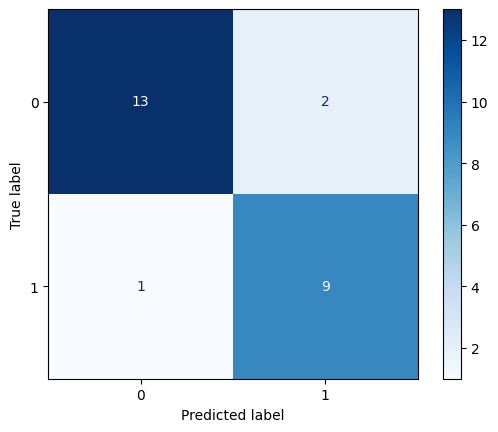

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Predict probabilities and convert to binary predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to 0 or 1

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int) if hasattr(y_pred, "shape") else y_pred  # For Keras models
    acc = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    auc = roc_auc_score(y_test, y_pred_binary)
    print(f"{model_name} Results:")
    print(f"Accuracy: {acc:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, AUC: {auc:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_binary))
    print("-" * 50)
    return {"model": model_name, "accuracy": acc, "precision": precision, "recall": recall, "f1": f1, "auc": auc}

# Evaluate Keras Model
keras_results = evaluate_model(model, X_test, y_test, "Feed-Forward Neural Network")

# Train Scikit-learn models
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_results = evaluate_model(log_reg, X_test, y_test, "Logistic Regression")

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_results = evaluate_model(rf_clf, X_test, y_test, "Random Forest")

# Support Vector Classifier (SVC)
svc_clf = SVC(probability=True, random_state=42)
svc_clf.fit(X_train, y_train)
svc_results = evaluate_model(svc_clf, X_test, y_test, "Support Vector Classifier")

# Summarize all results
import pandas as pd
results_df = pd.DataFrame([keras_results, log_reg_results, rf_results, svc_results])
print("Model Comparison:")
print(results_df)


1/1 [==============================] - 0s 30ms/step
Feed-Forward Neural Network Results:
Accuracy: 0.88, Precision: 0.82, Recall: 0.90, F1-score: 0.86, AUC: 0.88
Confusion Matrix:
[[13  2]
 [ 1  9]]
--------------------------------------------------
Logistic Regression Results:
Accuracy: 0.80, Precision: 0.73, Recall: 0.80, F1-score: 0.76, AUC: 0.80
Confusion Matrix:
[[12  3]
 [ 2  8]]
--------------------------------------------------
Random Forest Results:
Accuracy: 0.76, Precision: 0.75, Recall: 0.60, F1-score: 0.67, AUC: 0.73
Confusion Matrix:
[[13  2]
 [ 4  6]]
--------------------------------------------------
Support Vector Classifier Results:
Accuracy: 0.88, Precision: 0.82, Recall: 0.90, F1-score: 0.86, AUC: 0.88
Confusion Matrix:
[[13  2]
 [ 1  9]]
--------------------------------------------------
Model Comparison:
                         model  accuracy  precision  recall        f1  \
0  Feed-Forward Neural Network      0.88   0.818182     0.9  0.857143   
1          Logis